In [5]:
import numpy as np

In [7]:
from sklearn.datasets import make_regression #data set aléatoire 

In [8]:
import matplotlib.pyplot as plt #bibliotheque pour visualisé nos données 

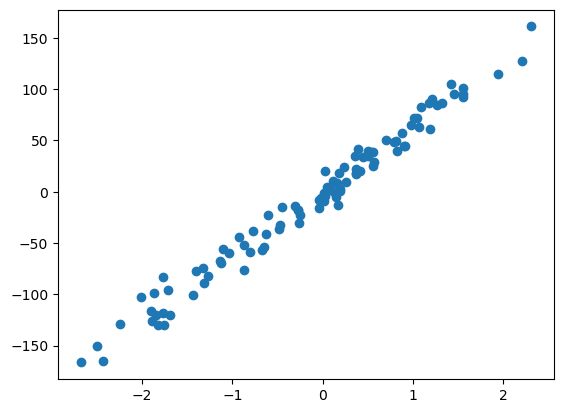

In [67]:
#1/Dataset 
x,y =make_regression(n_samples =100 ,n_features=1 ,noise=10 )#nbvdonnées et nb variable et le bruit
plt.scatter(x,y) # x en abssice et y en ordonné 

In [11]:
print(x.shape)
print(y.shape)
#important de verifier les dimensions des matrices car sinon
#ça va faire du n'importe quoi elle va affiché à la fin des traits partout et pour chaque valeur

(100, 1)
(100,)


In [12]:
y=y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)


In [17]:
#matrice 
X=np.hstack((x, np.ones(x.shape)))
X

array([[-0.71630125,  1.        ],
       [-0.60668532,  1.        ],
       [ 4.35290183,  1.        ],
       [ 1.44671652,  1.        ],
       [ 0.86412162,  1.        ],
       [ 0.38635336,  1.        ],
       [-1.23309232,  1.        ],
       [ 1.16371272,  1.        ],
       [ 1.26343367,  1.        ],
       [ 0.64536051,  1.        ],
       [-0.55666188,  1.        ],
       [ 0.10295857,  1.        ],
       [-0.96110675,  1.        ],
       [ 0.71811834,  1.        ],
       [ 0.10118678,  1.        ],
       [-0.63011141,  1.        ],
       [-0.80605902,  1.        ],
       [-0.4115749 ,  1.        ],
       [ 0.24757588,  1.        ],
       [-0.26325044,  1.        ],
       [-0.04507475,  1.        ],
       [ 0.10037926,  1.        ],
       [-0.59300111,  1.        ],
       [-0.59711051,  1.        ],
       [-1.25037483,  1.        ],
       [ 0.71918861,  1.        ],
       [ 0.96813449,  1.        ],
       [-1.27735676,  1.        ],
       [-0.77551029,

In [19]:
theta =np.random.randn(2,1)
theta

array([[-0.05191254],
       [ 0.26189673]])

In [21]:
#modele

In [23]:
def modele(X,theta):
    return X.dot(theta) #multiplication entre matrices ou arrays

In [25]:
modele(X,theta)

array([[0.29908175],
       [0.29339131],
       [0.03592654],
       [0.186794  ],
       [0.21703798],
       [0.24184015],
       [0.32590969],
       [0.20148545],
       [0.19630868],
       [0.22839443],
       [0.29079446],
       [0.25655189],
       [0.31179022],
       [0.22461738],
       [0.25664387],
       [0.29460741],
       [0.3037413 ],
       [0.28326263],
       [0.24904444],
       [0.27556273],
       [0.26423668],
       [0.25668579],
       [0.29268093],
       [0.29289425],
       [0.32680686],
       [0.22456182],
       [0.21163841],
       [0.32820757],
       [0.30215544],
       [0.16583139],
       [0.19693321],
       [0.32731764],
       [0.29241749],
       [0.29099743],
       [0.30203289],
       [0.19756705],
       [0.26313752],
       [0.24776055],
       [0.34498053],
       [0.21207812],
       [0.21199724],
       [0.20068725],
       [0.19517214],
       [0.28186522],
       [0.23688704],
       [0.24293706],
       [0.16781668],
       [0.227

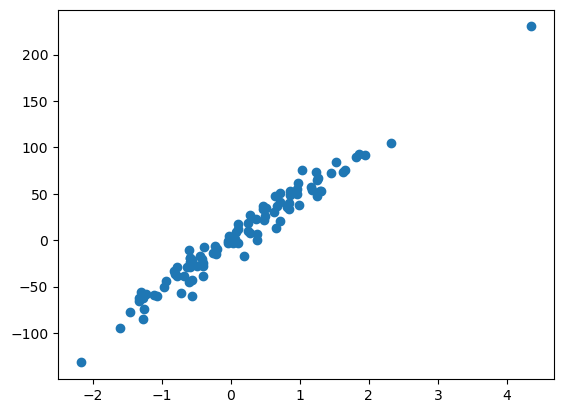

In [27]:
plt.scatter(x,y)

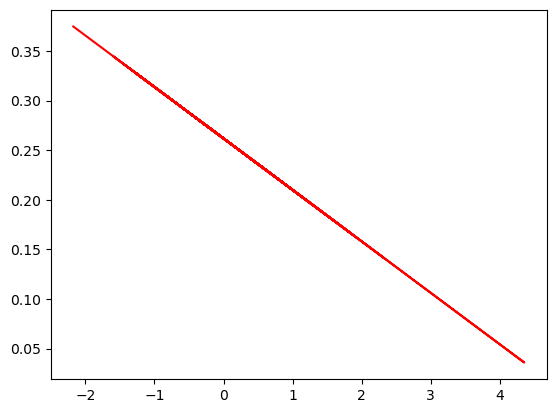

In [29]:
plt.plot(x,modele(X,theta),c='r')

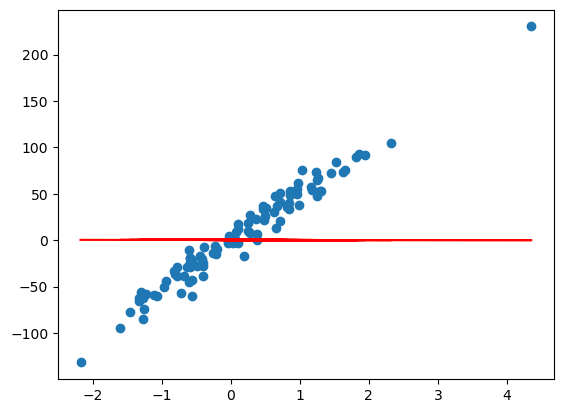

In [31]:
#on regroupe les deux ça donne 
plt.scatter(x,y)
plt.plot(x,modele(X,theta),c='r')

In [33]:
#fontion cout

In [35]:
def cost_func (X,y,theta):
    m=len(y)
    return 1/(2*m) * np.sum((modele(X,theta)-y)**2)

In [37]:
cost_func(X,y,theta)

1442.6173012117993

In [39]:
#calcule du graditent algo minimisation 

In [41]:
def grad(X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(modele(X,theta)-y)
    

In [43]:
def grad_decent(X,y,theta,learning_rate,n_iterations):
    cost_history=np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta=theta - learning_rate * grad(X,y,theta)
        cost_history[i]=cost_func(X,y,theta)
    return theta , cost_history


In [45]:
#Entrainement du modèle "MACHINE LEARNING"
theta_final, cost_history =grad_decent(X,y,theta,learning_rate=0.1,n_iterations=1000)
#learning rate peut donner un résultats de plus en plus prècis 

In [47]:
theta_final

array([[51.24461857],
       [-0.89583031]])

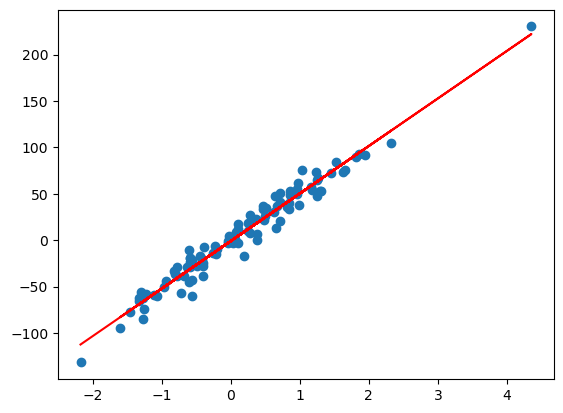

In [49]:
prediction=modele(X,theta_final)
plt.scatter(x,y)
plt.plot(x,prediction,c='r')

In [51]:
#courbe d'apprentissage en fonction des iterations en abssice

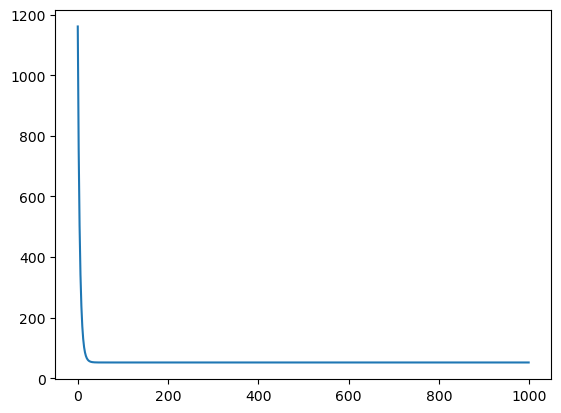

In [53]:
plt.plot(range(1000),cost_history)

In [55]:
#Coefficient de détermination 

In [57]:
def coef_determination(y,pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v

In [59]:
coef_determination(y,prediction)
#plus proche de 1 plus performant 

0.9633374000057603